In [69]:
# importing libraries for data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier


# Data Exploring

In [32]:
# creating a dataframe from csv file and displaying first ten rows

df = pd.read_csv("pulsar_data_train.csv")

df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [33]:
df.shape

(12528, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [35]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [36]:
df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [37]:
df.duplicated().sum()

0

# Histograms

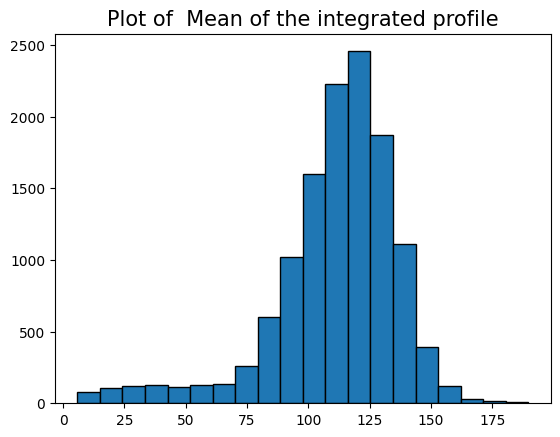

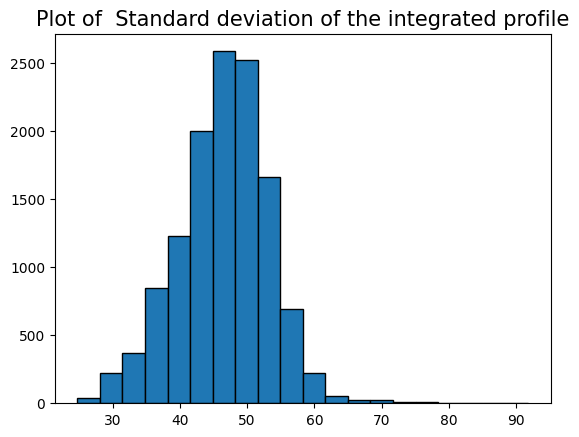

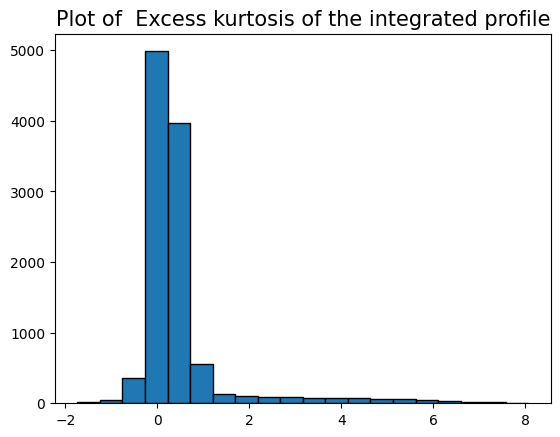

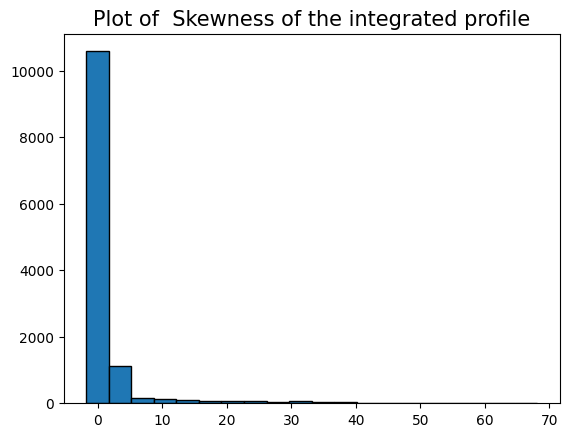

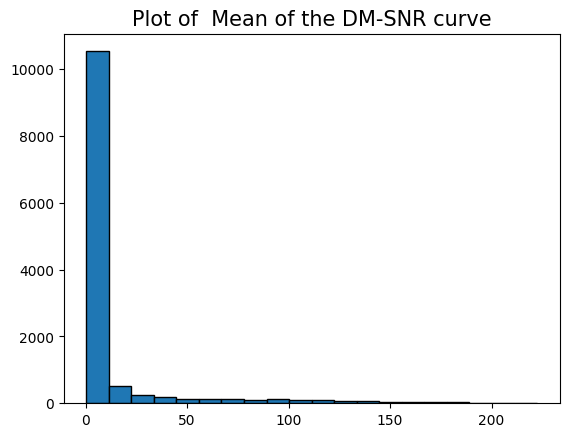

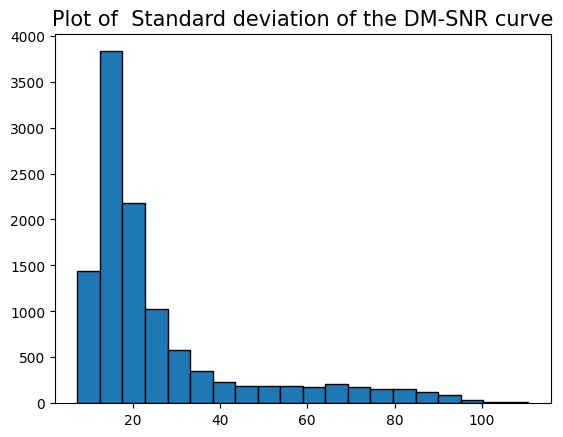

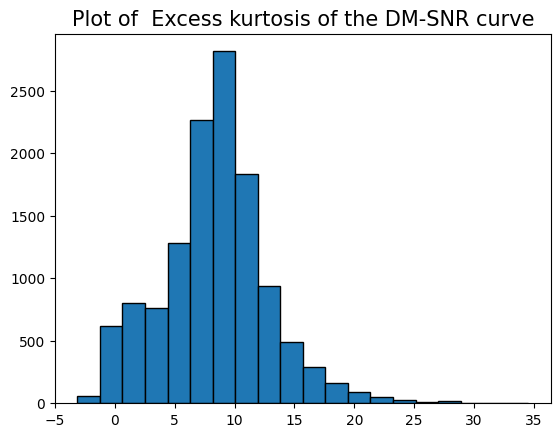

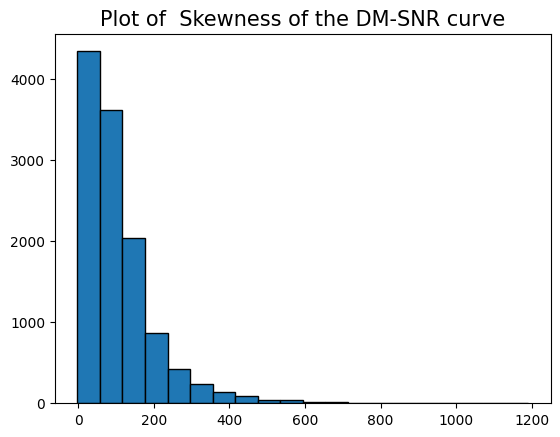

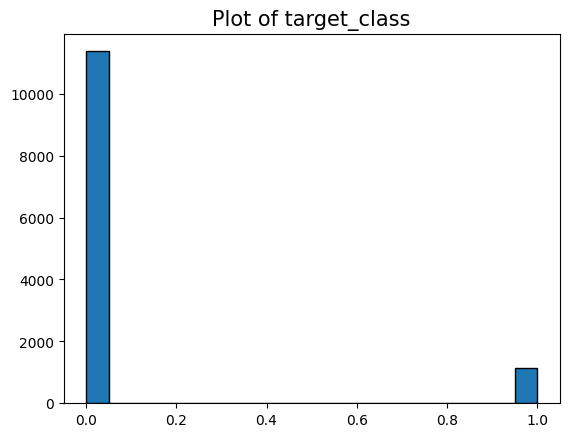

In [38]:
for feature in df.columns:
    plt.title("Plot of "+feature,fontsize=15)
    plt.hist(df[feature],bins=20, edgecolor='black')
    plt.show()

# Correlations

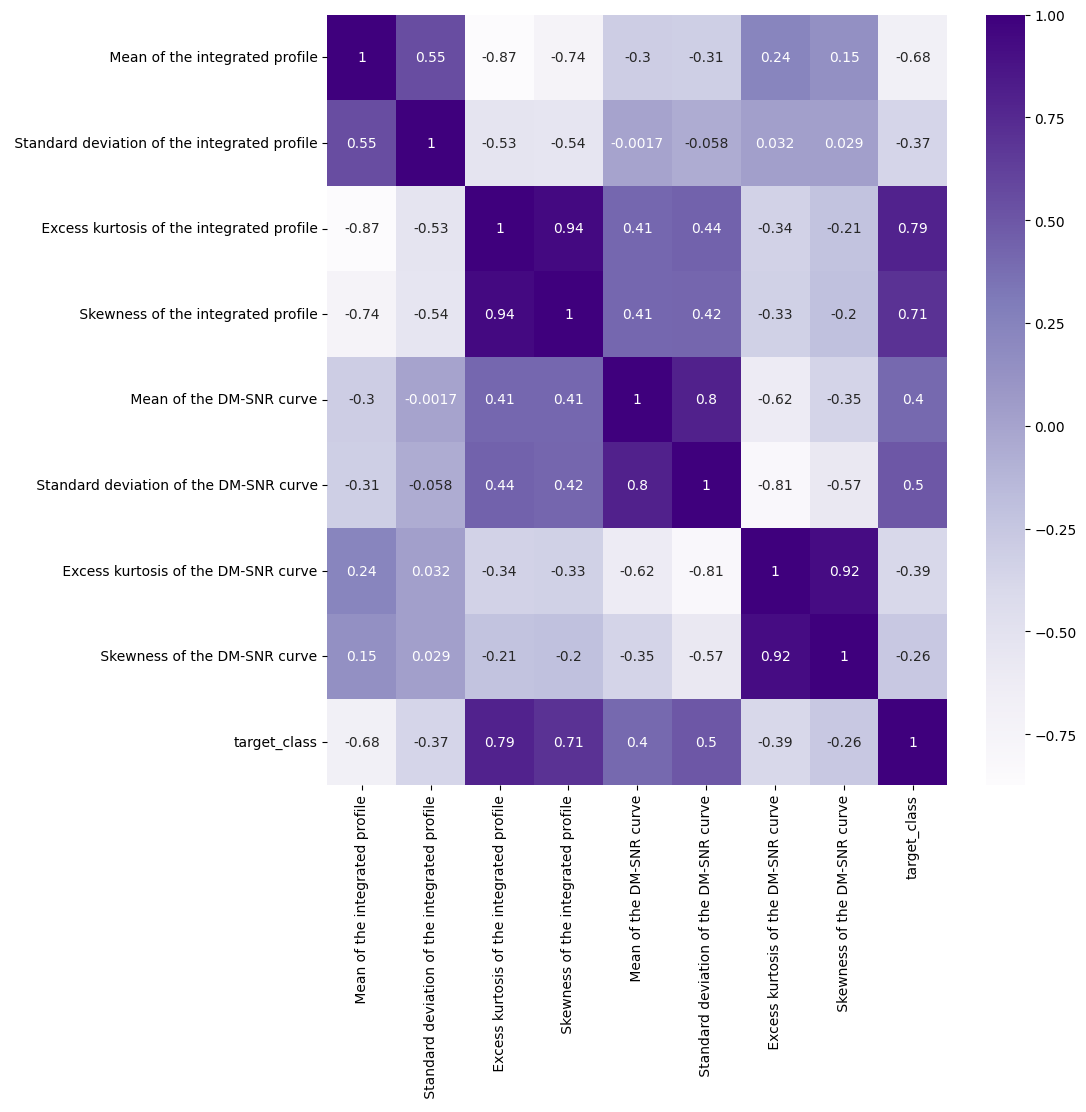

In [39]:
# creating heatmap to see any possible correlations
plt.figure(figsize = (10,10))
correlations = df.corr();
sns.heatmap(correlations, cmap='Purples' , annot=True);

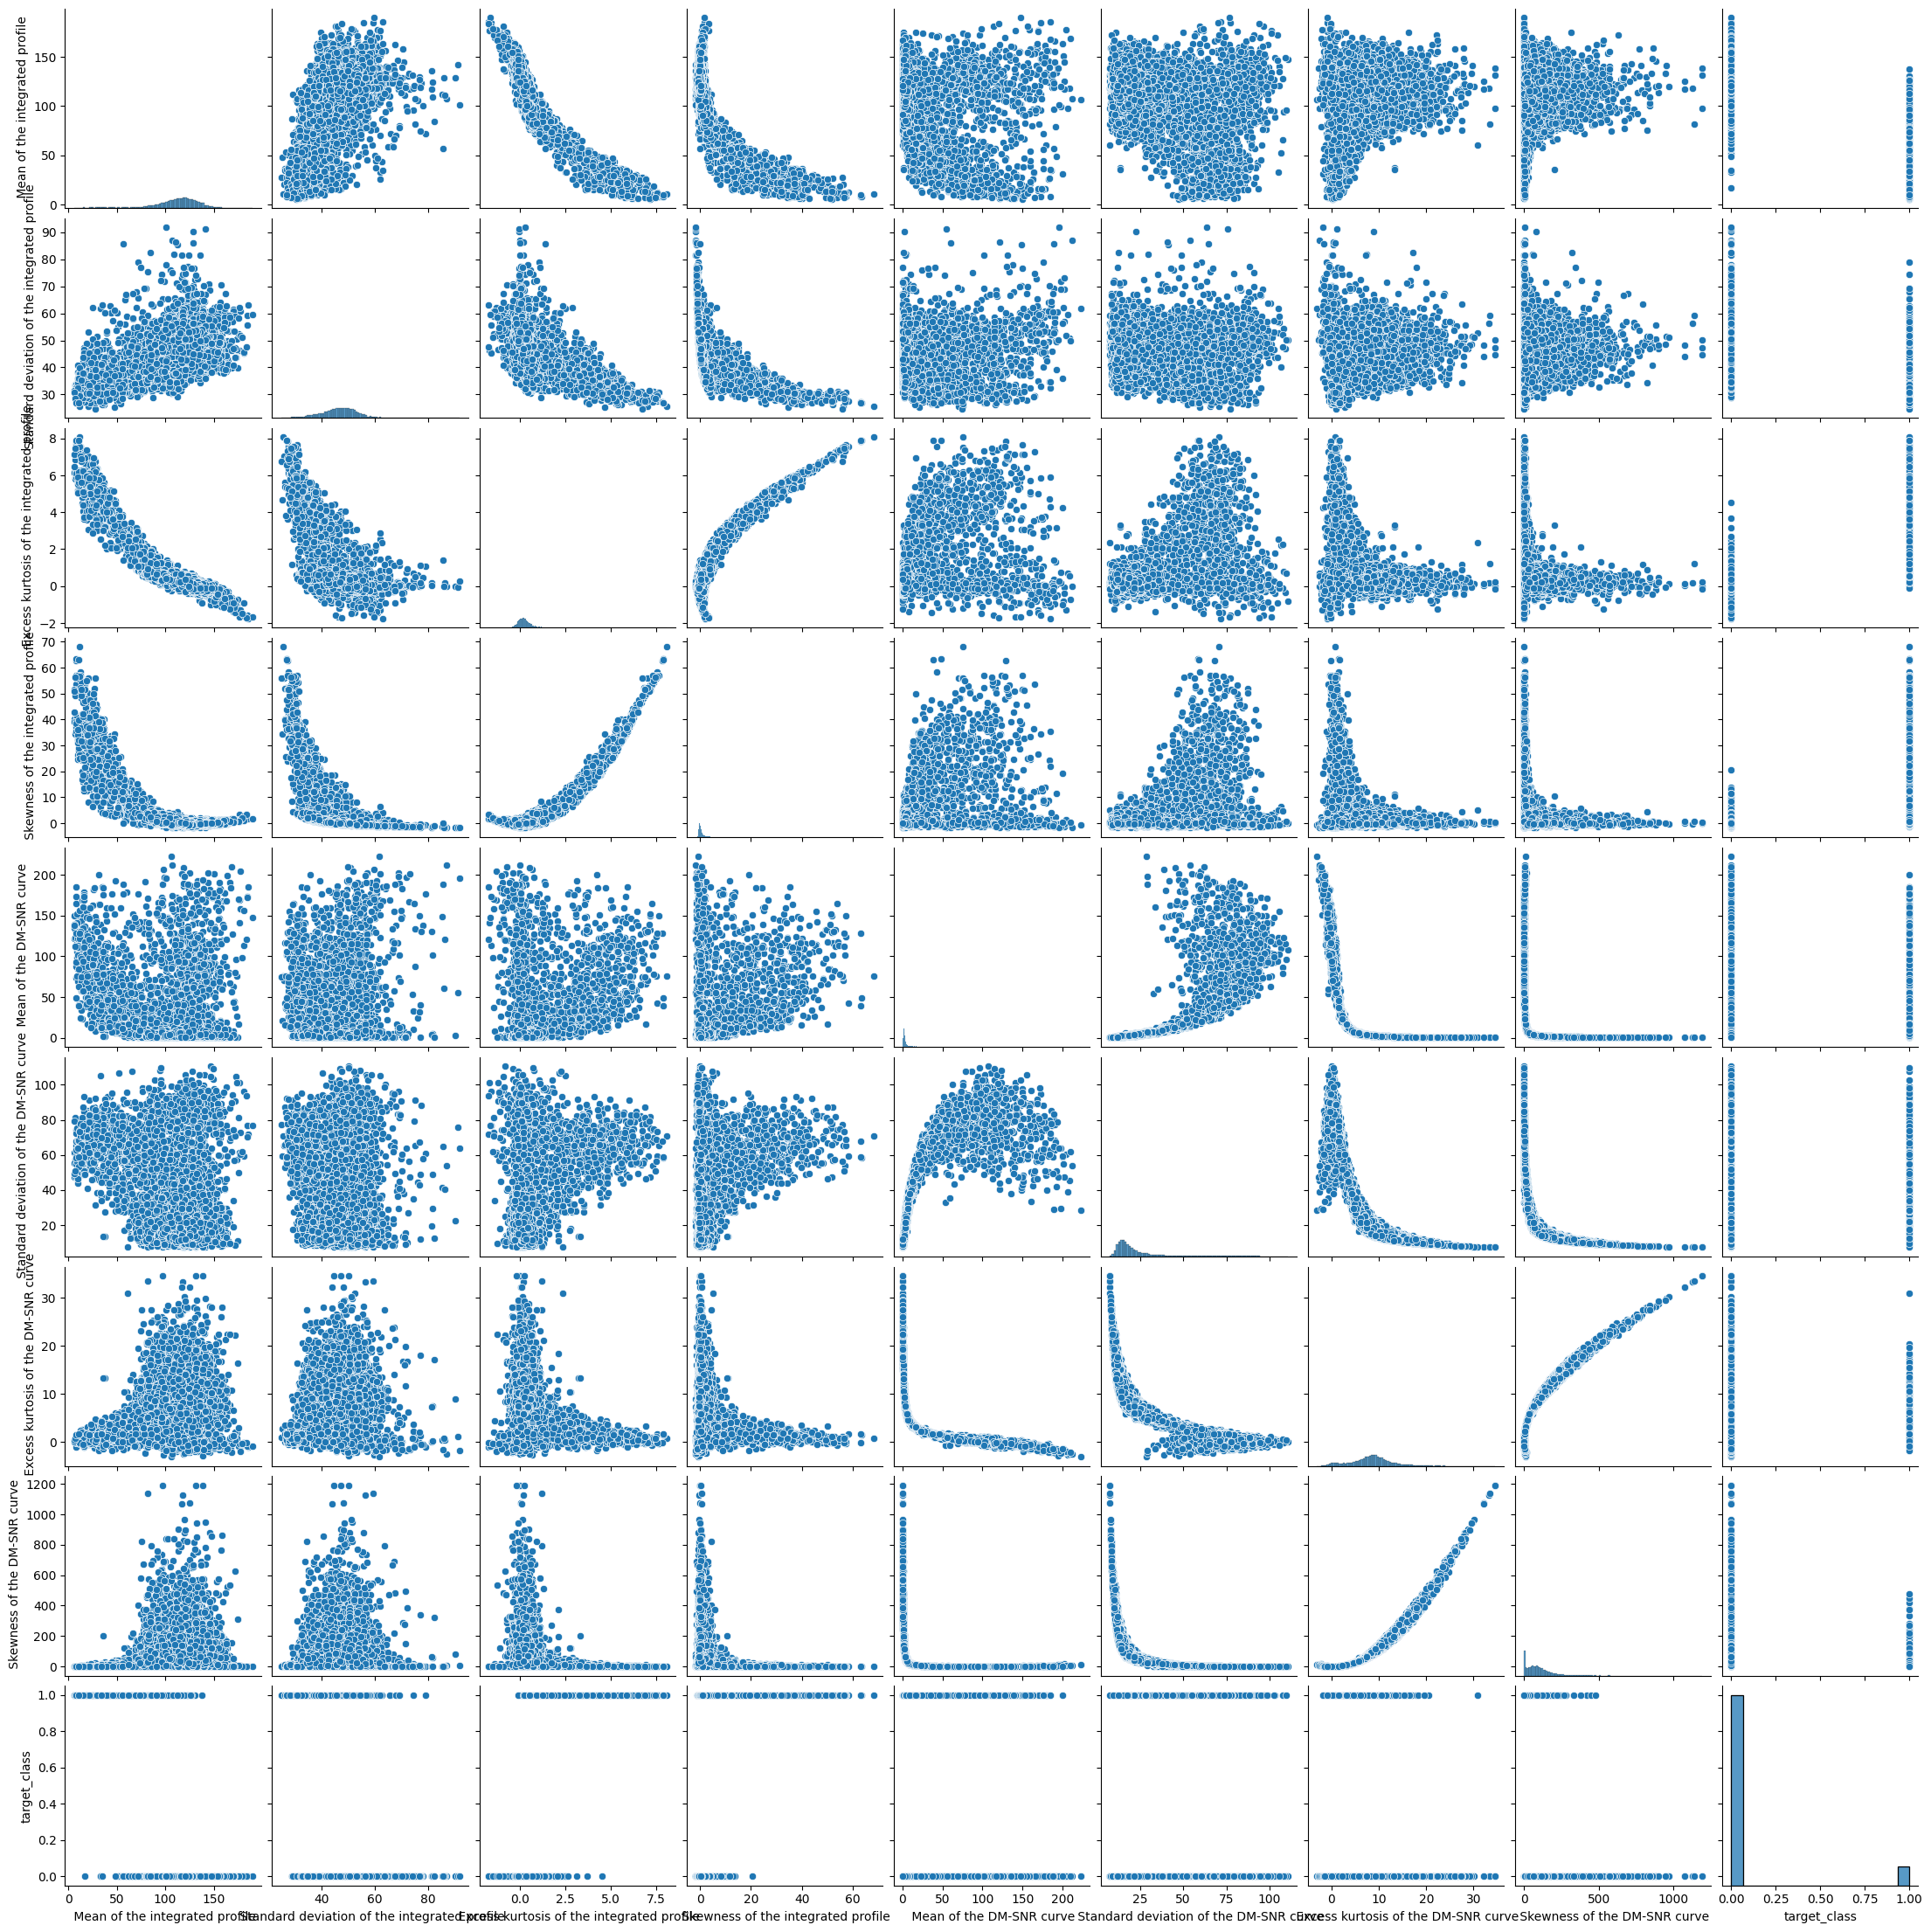

In [40]:
sns.pairplot(df)

In [41]:
# Applying the log10 function to population not staying at home
# df['Population_Not_Home_Log'] = np.log10(df['Population Not Staying at Home'])
# df['Population_Staying_Home_Log'] = np.log10(df['Population Staying at Home'])

In [42]:
# df['Standard_deviation_of_the_DM-SNR_Log_Curve'] = np.log1p(df[' Standard deviation of the DM-SNR curve'])
df['Standard_deviation_of_the_DM-SNR_Log_Curve'] = np.log1p(df[' Standard deviation of the DM-SNR curve'])
df['Log_of_Mean of the DM-SNR curve'] =np.log10(df[' Mean of the DM-SNR curve'])


In [43]:
# creating a function to plot histograms
def feat_hist(feature, slices, axis):
    feature.hist(bins=slices, edgecolor='black')
    plt.xlabel(axis)

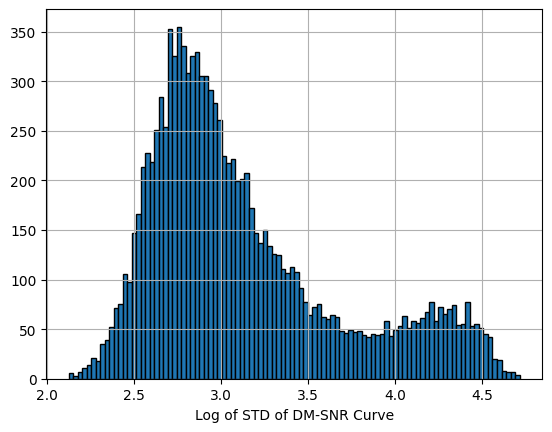

In [44]:
feat_hist(df["Standard_deviation_of_the_DM-SNR_Log_Curve"], 100, "Log of STD of DM-SNR Curve")

# Boxplots

In [45]:
def outliers(dataframe, feature):
    sns.boxplot(data=dataframe, y=feature,
                notch=True,
                medianprops=dict(linestyle='-', linewidth=2, color='Yellow'),
                width=0.15
                )
    plt.show()

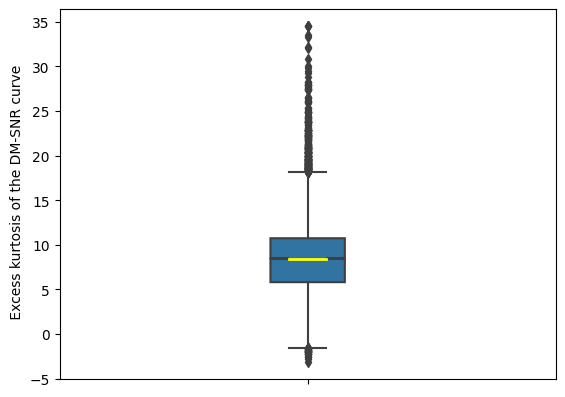

In [46]:
outliers(dataframe=df,feature=df[' Excess kurtosis of the DM-SNR curve'])

In [47]:
def box_loop(dataframe, features_list):
    for x in features_list:
        sns.boxplot(data=dataframe, y=x,
            notch=True,
            medianprops=dict(linestyle='-', linewidth=1, color='Yellow'),
            width=.1
        )
        plt.show()

In [48]:
features_list = [' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class', 'Standard_deviation_of_the_DM-SNR_Log_Curve',
       'Log_of_Mean of the DM-SNR curve']

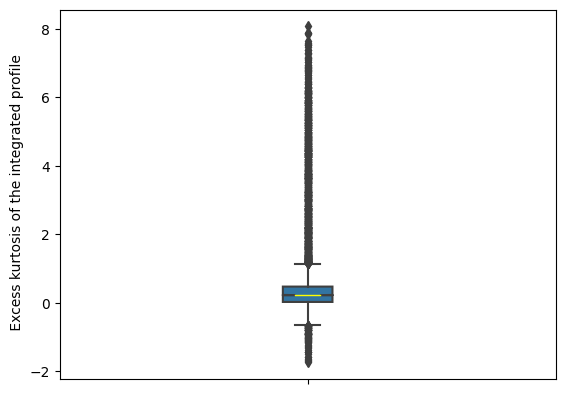

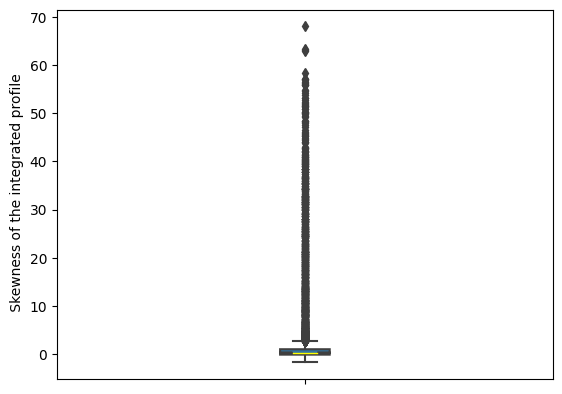

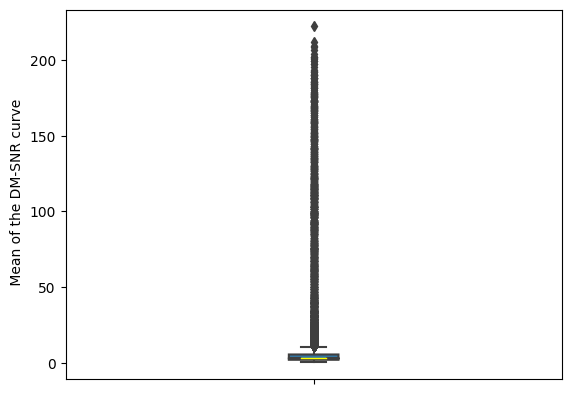

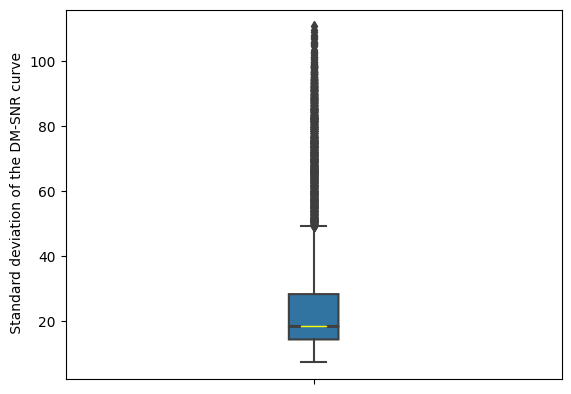

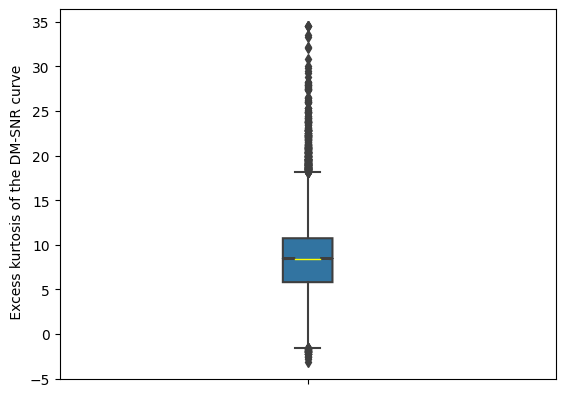

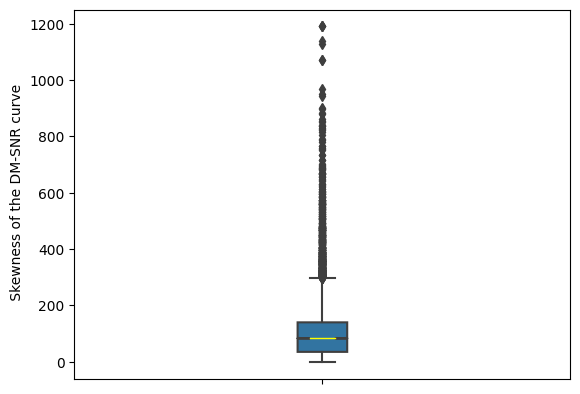

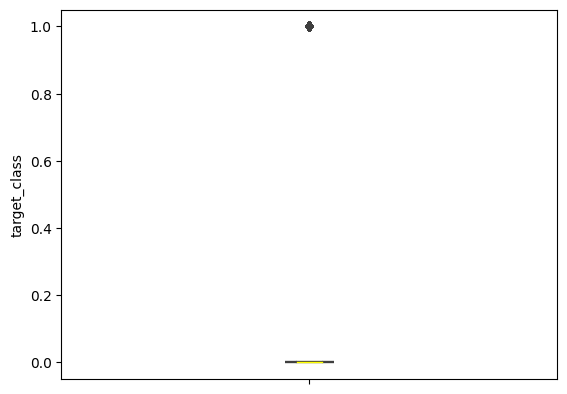

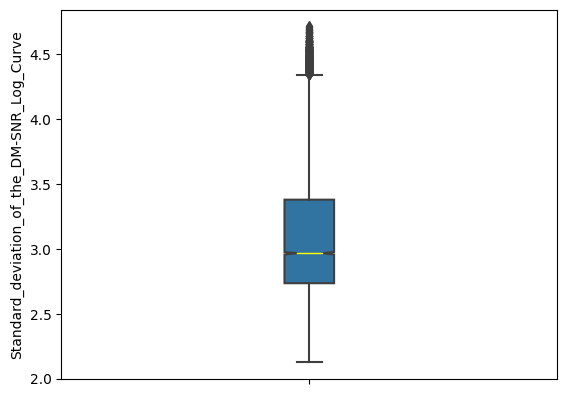

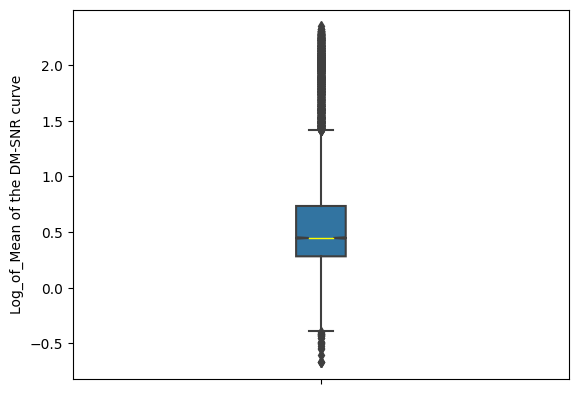

In [49]:
box_loop(dataframe=df, features_list=features_list)

In [50]:
df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
Standard_deviation_of_the_DM-SNR_Log_Curve       1178
Log_of_Mean of the DM-SNR curve                     0
dtype: int64

In [51]:
diag = df.dropna(subset=[' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve',' Skewness of the DM-SNR curve'])

In [52]:
diag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 12527
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                9273 non-null   float64
 1    Standard deviation of the integrated profile  9273 non-null   float64
 2    Excess kurtosis of the integrated profile     9273 non-null   float64
 3    Skewness of the integrated profile            9273 non-null   float64
 4    Mean of the DM-SNR curve                      9273 non-null   float64
 5    Standard deviation of the DM-SNR curve        9273 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           9273 non-null   float64
 7    Skewness of the DM-SNR curve                  9273 non-null   float64
 8   target_class                                   9273 non-null   float64
 9   Standard_deviation_of_the_DM-SNR_Log_Curve     9273

In [53]:
X = diag.drop(columns=['target_class'])
y = diag['target_class']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

# Models

In [55]:
np.random.seed(50)
naive_guess = np.random.binomial(1, p=np.mean(y), size=len(y_test))
naive_guess[:10], naive_guess.sum()

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 238)

In [56]:
print(f'Naive Baseline\n')
roc = roc_auc_score(y_test, np.repeat(np.mean(y), len(y_test)))
print(f'ROC AUC: {round(roc, 4)}')

for metric in [precision_score, recall_score, f1_score]:
    print(f'{metric.__name__}: {round(metric(y_test, naive_guess), 4)}')

Naive Baseline

ROC AUC: 0.5
precision_score: 0.1176
recall_score: 0.125
f1_score: 0.1212


In [62]:
logreg = LogisticRegression(random_state=50)
scaler = StandardScaler()

In [65]:
logreg_pipe = make_pipeline(scaler, logreg)

baseline = logreg_pipe.fit(X_train, y_train)

In [67]:
def eval(model, test, test_y):
        # Predict probabilities and labels
    probs = model.predict_proba(test)[:, 1]
    preds = model.predict(test)

    # Calculate ROC AUC
    roc = roc_auc_score(test_y, probs)
    name = repr(model).split('(')[0]
    print(f"{name}\n")
    print(f'ROC AUC: {round(roc, 4)}')

    # Iterate through metrics
    for metric in [precision_score, recall_score, f1_score]:
        # Use .__name__ attribute to list metric
        print(f'{metric.__name__}: {round(metric(test_y, preds), 4)}')

    return model, preds


In [68]:
eval(baseline, X_test, y_test)

Pipeline

ROC AUC: 0.9792
precision_score: 0.9394
recall_score: 0.8304
f1_score: 0.8815


(Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=50))]),
 array([0., 0., 0., ..., 0., 0., 1.]))

In [70]:
# creating parameter grid for use in a decision tree model
p_grid = {
    "max_depth": [1, 2, 3],
    "min_samples_leaf": [3, 15, 20],
    "min_samples_split": [2, 10, 100]
}

# creating the decision tree model
dec_tree = DecisionTreeClassifier()

# Using GridSearchCH
dec_tree_grid = GridSearchCV(dec_tree, p_grid)

# fitting onto the training set
dec_tree_grid.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [71]:
eval(dec_tree_grid, X_test, y_test)

GridSearchCV

ROC AUC: 0.9212
precision_score: 0.9406
recall_score: 0.8482
f1_score: 0.892


(GridSearchCV(estimator=DecisionTreeClassifier(),
              param_grid={'max_depth': [1, 2, 3],
                          'min_samples_leaf': [3, 15, 20],
                          'min_samples_split': [2, 10, 100]}),
 array([0., 0., 0., ..., 0., 0., 1.]))

# END